Importing required libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

Importing and exploring the dataset

In [2]:
#importing datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [4]:
train

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219124,219124,120580.0,1.891079,-1.272908,-3.783908,-1.388939,2.012789,2.666080,0.151740,0.401934,...,-0.181369,-0.456538,-0.069571,0.756765,0.244479,-0.147566,-0.054725,-0.044588,198.65,0
219125,219125,120580.0,0.139724,0.948649,-2.913655,-2.184829,1.883716,-1.056824,1.725624,0.018089,...,0.491469,1.478823,-0.085398,-0.091409,-1.053488,0.467570,0.358918,0.294735,24.00,0
219126,219126,120580.0,2.058343,-0.038993,-1.928553,0.330117,0.270127,-0.735664,-0.173878,0.144823,...,-0.306640,-0.965783,0.307799,-0.021434,-0.343989,0.181065,-0.098387,-0.044064,1.79,0
219127,219127,120580.0,2.079227,-2.162389,-1.785833,-2.804889,0.552845,4.038013,-2.155900,1.023785,...,0.109909,0.590401,0.286621,0.675660,-0.510736,-0.090044,0.056749,-0.017126,88.00,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

In [6]:
train.isnull().sum()

id        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
test

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,...,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
1,219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,...,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
2,219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,...,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
3,219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,...,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
4,219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,...,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146082,365211,172789.0,-0.661834,-0.622980,0.735580,-0.554067,0.869889,-0.389502,0.161226,0.069945,...,0.262408,-0.046068,-0.425692,0.253833,-1.076331,-0.999877,0.161938,0.149243,0.279708,94.81
146083,365212,172789.0,-0.098889,0.761900,0.340012,-0.589546,0.717091,-0.262765,0.726272,-0.070608,...,0.064640,0.441215,1.284819,-0.141790,0.646930,-0.419964,-0.561426,0.326700,0.255166,24.99
146084,365213,172789.0,-1.487918,1.769142,0.551671,0.361566,0.056347,0.084844,0.567545,-0.059899,...,0.792736,0.163500,1.287079,-0.186955,-0.349847,-0.161724,-0.213933,0.392745,0.070938,29.99
146085,365214,172790.0,-1.889979,-0.154869,0.068496,-1.906964,-1.743181,0.717490,0.981608,-0.209713,...,-0.513829,0.121457,0.764642,-0.217844,0.104599,-0.008906,-0.204957,-0.752326,-0.155728,314.00


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146087 entries, 0 to 146086
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      146087 non-null  int64  
 1   Time    146087 non-null  float64
 2   V1      146087 non-null  float64
 3   V2      146087 non-null  float64
 4   V3      146087 non-null  float64
 5   V4      146087 non-null  float64
 6   V5      146087 non-null  float64
 7   V6      146087 non-null  float64
 8   V7      146087 non-null  float64
 9   V8      146087 non-null  float64
 10  V9      146087 non-null  float64
 11  V10     146087 non-null  float64
 12  V11     146087 non-null  float64
 13  V12     146087 non-null  float64
 14  V13     146087 non-null  float64
 15  V14     146087 non-null  float64
 16  V15     146087 non-null  float64
 17  V16     146087 non-null  float64
 18  V17     146087 non-null  float64
 19  V18     146087 non-null  float64
 20  V19     146087 non-null  float64
 21  V20     14

In [9]:
test.isnull().sum()

id        0
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

In [10]:
submission

,id,Class
0,219129,0.5
1,219130,0.5
2,219131,0.5
3,219132,0.5
4,219133,0.5
...,...,...
146082,365211,0.5
146083,365212,0.5
146084,365213,0.5
146085,365214,0.5


Exploratory Data Analysis

C:\Users\paula\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


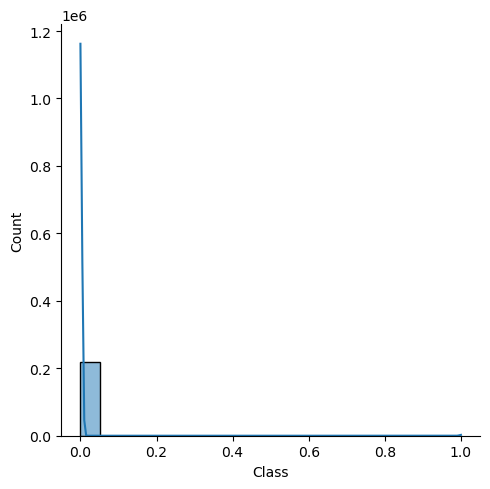

In [11]:
sns.displot(train['Class'], kde=True)

In [12]:
train['Class'].value_counts()

Class
0    218660
1       469
Name: count, dtype: int64

<Axes: >

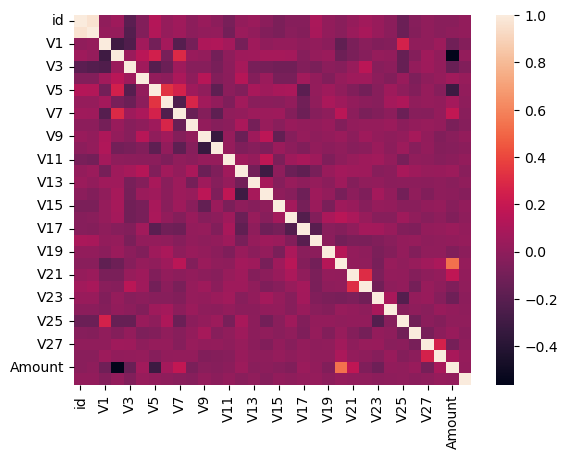

In [13]:
correlation = train.corr()
sns.heatmap(correlation)

In [15]:
target = train['Class']

In [17]:
#Combining Train and test data
train = train.drop(['Class'], axis = 1)

train_test = pd.concat([train, test])
train_test

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146082,365211,172789.0,-0.661834,-0.622980,0.735580,-0.554067,0.869889,-0.389502,0.161226,0.069945,...,0.262408,-0.046068,-0.425692,0.253833,-1.076331,-0.999877,0.161938,0.149243,0.279708,94.81
146083,365212,172789.0,-0.098889,0.761900,0.340012,-0.589546,0.717091,-0.262765,0.726272,-0.070608,...,0.064640,0.441215,1.284819,-0.141790,0.646930,-0.419964,-0.561426,0.326700,0.255166,24.99
146084,365213,172789.0,-1.487918,1.769142,0.551671,0.361566,0.056347,0.084844,0.567545,-0.059899,...,0.792736,0.163500,1.287079,-0.186955,-0.349847,-0.161724,-0.213933,0.392745,0.070938,29.99
146085,365214,172790.0,-1.889979,-0.154869,0.068496,-1.906964,-1.743181,0.717490,0.981608,-0.209713,...,-0.513829,0.121457,0.764642,-0.217844,0.104599,-0.008906,-0.204957,-0.752326,-0.155728,314.00


In [18]:
train_test = train_test.drop(['id'], axis = 1)
train_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,0.742144,...,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98
1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,-0.109948,...,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00
2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,-0.042027,...,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69
3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,0.885838,...,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00
4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,0.692665,...,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146082,172789.0,-0.661834,-0.622980,0.735580,-0.554067,0.869889,-0.389502,0.161226,0.069945,0.698829,...,0.262408,-0.046068,-0.425692,0.253833,-1.076331,-0.999877,0.161938,0.149243,0.279708,94.81
146083,172789.0,-0.098889,0.761900,0.340012,-0.589546,0.717091,-0.262765,0.726272,-0.070608,0.095958,...,0.064640,0.441215,1.284819,-0.141790,0.646930,-0.419964,-0.561426,0.326700,0.255166,24.99
146084,172789.0,-1.487918,1.769142,0.551671,0.361566,0.056347,0.084844,0.567545,-0.059899,0.331706,...,0.792736,0.163500,1.287079,-0.186955,-0.349847,-0.161724,-0.213933,0.392745,0.070938,29.99
146085,172790.0,-1.889979,-0.154869,0.068496,-1.906964,-1.743181,0.717490,0.981608,-0.209713,-0.556087,...,-0.513829,0.121457,0.764642,-0.217844,0.104599,-0.008906,-0.204957,-0.752326,-0.155728,314.00


In [19]:
train_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365216 entries, 0 to 146086
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    365216 non-null  float64
 1   V1      365216 non-null  float64
 2   V2      365216 non-null  float64
 3   V3      365216 non-null  float64
 4   V4      365216 non-null  float64
 5   V5      365216 non-null  float64
 6   V6      365216 non-null  float64
 7   V7      365216 non-null  float64
 8   V8      365216 non-null  float64
 9   V9      365216 non-null  float64
 10  V10     365216 non-null  float64
 11  V11     365216 non-null  float64
 12  V12     365216 non-null  float64
 13  V13     365216 non-null  float64
 14  V14     365216 non-null  float64
 15  V15     365216 non-null  float64
 16  V16     365216 non-null  float64
 17  V17     365216 non-null  float64
 18  V18     365216 non-null  float64
 19  V19     365216 non-null  float64
 20  V20     365216 non-null  float64
 21  V21     365216 

In [20]:
train_test.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
dtype: int64

<Axes: >

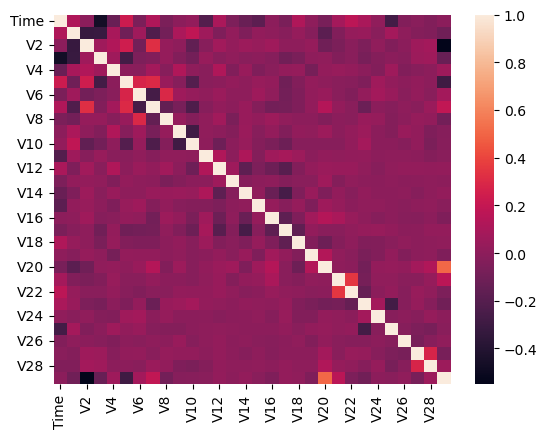

In [22]:
correlation = train_test.corr()
sns.heatmap(correlation)

In [23]:
correlation

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.119417,-0.003797,-0.470025,-0.129612,0.227164,-0.059728,0.116732,-0.063032,-0.004555,...,-0.072972,0.083404,0.168469,0.098360,0.009009,-0.275321,-0.038334,-0.011321,-0.043860,-0.009441
V1,0.119417,1.000000,-0.320522,-0.316820,0.094825,-0.101955,0.062802,-0.224474,-0.091765,0.109924,...,-0.183317,-0.045284,0.027099,0.037518,-0.016692,0.081297,0.001484,-0.029697,-0.047205,-0.103022
V2,-0.003797,-0.320522,1.000000,0.064338,0.124547,0.241249,-0.095283,0.317439,0.030731,0.006790,...,-0.107169,-0.061913,-0.015597,-0.054767,0.009981,-0.046290,-0.007812,0.061330,0.079507,-0.549684
V3,-0.470025,-0.316820,0.064338,1.000000,0.066400,-0.274402,-0.053702,-0.038816,0.028505,-0.035396,...,0.010962,-0.041124,-0.016426,-0.076209,-0.030737,-0.006466,-0.022408,0.054658,0.063640,-0.136570
V4,-0.129612,0.094825,0.124547,0.066400,1.000000,-0.006184,-0.012866,0.077515,-0.020639,0.127236,...,0.023125,0.036194,0.023397,-0.004935,-0.036755,0.058128,-0.044464,-0.019125,-0.003829,0.060759
V5,0.227164,-0.101955,0.241249,-0.274402,-0.006184,1.000000,0.279452,0.299768,0.041888,-0.026947,...,0.004351,-0.012828,-0.022375,-0.052569,0.064604,0.015068,-0.002971,0.019111,-0.002002,-0.293973
V6,-0.059728,0.062802,-0.095283,-0.053702,-0.012866,0.279452,1.000000,-0.269155,0.294436,0.060278,...,0.040181,-0.012691,-0.046951,0.020807,0.078592,0.040235,-0.012062,0.021602,-0.015373,0.077067
V7,0.116732,-0.224474,0.317439,-0.038816,0.077515,0.299768,-0.269155,1.000000,-0.154188,-0.073931,...,0.138474,0.025001,-0.011416,-0.120376,-0.005342,-0.023888,0.006270,-0.014931,0.049228,0.188325
V8,-0.063032,-0.091765,0.030731,0.028505,-0.020639,0.041888,0.294436,-0.154188,1.000000,0.030421,...,-0.038095,-0.008259,-0.015616,0.039264,0.030035,-0.030607,-0.001264,0.028228,0.018473,-0.089780
V9,-0.004555,0.109924,0.006790,-0.035396,0.127236,-0.026947,0.060278,-0.073931,0.030421,1.000000,...,0.049836,-0.006151,0.023386,0.049784,-0.009669,-0.029297,0.039789,0.016364,-0.048412,-0.025443


In [26]:
#Normalization
scaler = MinMaxScaler()
train_rev = scaler.fit_transform(train_test)
train_test_norm = pd.DataFrame(train_rev, columns=train_test.columns)
train_test_norm

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.989826,0.731451,0.718460,0.327527,0.518184,0.578601,0.440687,0.607113,0.428256,...,0.618338,0.390583,0.527150,0.434085,0.367855,0.430690,0.392777,0.414266,0.260190,0.000265
1,0.000000,0.987797,0.712858,0.742290,0.255078,0.505299,0.600830,0.424632,0.613762,0.389841,...,0.626829,0.401182,0.584114,0.427378,0.320468,0.410251,0.264971,0.417246,0.260867,0.011237
2,0.000000,0.936537,0.750251,0.753792,0.280529,0.530102,0.583850,0.452481,0.610901,0.392903,...,0.624767,0.390800,0.532790,0.428071,0.511203,0.405385,0.369457,0.427624,0.264850,0.000360
3,0.000000,0.987281,0.730531,0.721290,0.311306,0.517871,0.591885,0.437891,0.611948,0.434735,...,0.617222,0.397091,0.581336,0.428507,0.377019,0.465015,0.335016,0.415100,0.259737,0.000134
4,0.000000,0.961649,0.730748,0.808962,0.373580,0.512033,0.633249,0.425908,0.624765,0.426026,...,0.620453,0.402388,0.627519,0.423892,0.347343,0.495202,0.305234,0.422471,0.262747,0.000134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365211,0.999994,0.916290,0.723268,0.790865,0.273945,0.532906,0.598022,0.441399,0.614181,0.426303,...,0.631485,0.398436,0.558141,0.431350,0.237542,0.347489,0.384072,0.424286,0.270952,0.012684
365212,0.999994,0.931420,0.746229,0.775573,0.271979,0.530789,0.601021,0.449357,0.611201,0.399124,...,0.626803,0.411695,0.672844,0.418291,0.470131,0.415598,0.246577,0.432161,0.270173,0.003343
365213,0.999994,0.894089,0.762928,0.783756,0.324685,0.521634,0.609247,0.447121,0.611428,0.409752,...,0.644040,0.404138,0.672995,0.416800,0.335596,0.445927,0.312627,0.435091,0.264330,0.004012
365214,1.000000,0.883284,0.731029,0.765077,0.198974,0.496700,0.624219,0.452953,0.608253,0.369727,...,0.613109,0.402994,0.637962,0.415781,0.396933,0.463875,0.314334,0.384281,0.257140,0.042007


Defining X, Y variables ad splitting datasets

In [27]:
y = target
X = train_test_norm[: len(train)]
X_test = train_test_norm[len(train) :]
X['target'] = target

C:\Users\paula\AppData\Local\Temp\ipykernel_17096\583444752.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['target'] = target


In [28]:
train = X.sample(frac=.9, random_state=42)
test = X.drop(train.index)

X_train = train.iloc[:, :-1]
y_train = train.iloc[:,-1]

X_val = test.iloc[:, :-1]
y_val = test.iloc[:,-1]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((197216, 30), (197216,), (21913, 30), (21913,), (146087, 30))

Selecting and Building the Model

In [30]:
model = LogisticRegression()
logmodel = model.fit(X_train, y_train)
print(logmodel.score(X_train, y_train))

0.9977790848612689


Validating the accuracy of the model.

In [35]:
y_predict = logmodel.predict(X_val)
y_predict = y_predict.astype(int)
print(logmodel.score(X_val, y_val))

0.9982658695751381
